<a href="https://colab.research.google.com/github/abderrahimJK/Logistic-Regression_Social_Network_Ads/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
path_var = 'drive/MyDrive/Datasets/'

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


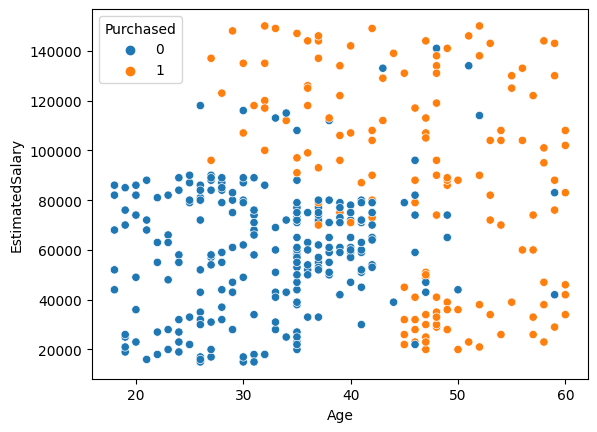

In [4]:
sns.scatterplot(x='Age',y='EstimatedSalary',hue='Purchased', data=dataset)
plt.show()

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression model on the Training set

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [8]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [9]:
y_pred = classifier.predict(X_test)

### Calculat accuracy

In [10]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.89


## Visualising the Training set results

<ipython-input-11-3277c112bab0>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


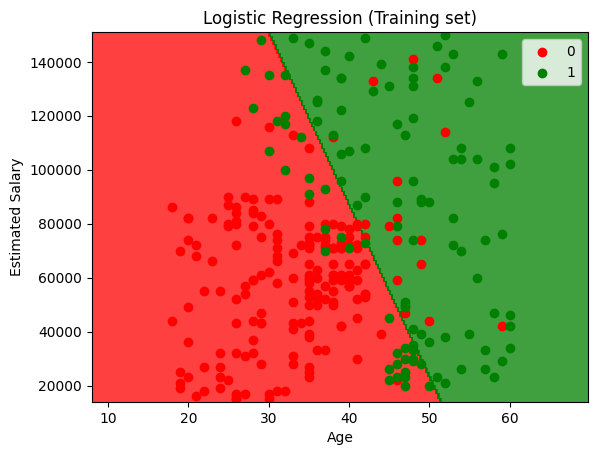

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Implementation from screach

### SigmoidFunction

### Cost Function

### Gradient Descente

In [12]:
class MyLogisticRegression:

  def __init__(self) -> None:
    self.W = np.random.randn(X.shape[1])
    self.b = np.random.randn(1)
    self.learning_rate = 0.01
   
  def gradientsDescente(self, X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    self.W = self.W - self.learning_rate * dW
    db = 1/len(y) * np.sum(A - y)
    self.b = self.b - self.learning_rate * db
    return (dW, db)

  def sigmoid(self,z):
    return 1/(1+np.exp(-z))

  def log_loss(self, y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

  def modele(self, X):
    Z = X.dot(self.W) + self.b
    A = self.sigmoid(Z)
    return A
  
  def predict(self, X):
    A = self.modele(X)
    A[A<0.5]=0
    A[A>=0.5]=1
    return A 

Text(0.5, 1.0, 'Evolution des erreurs')

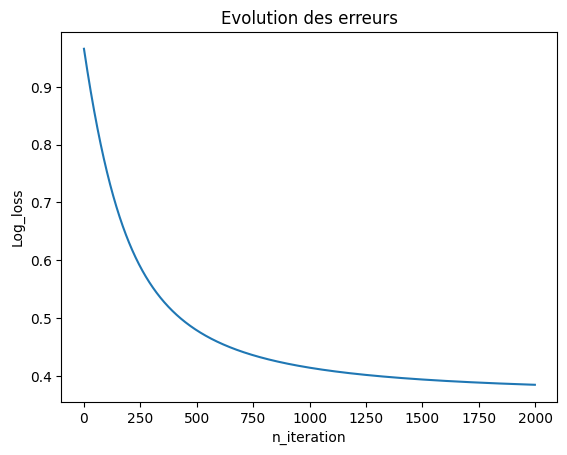

In [22]:
LR = MyLogisticRegression()
loss_history = []
for i in range(2000):
        A = LR.modele(X_train)
        loss_history.append(LR.log_loss(y_train, A))
        W, b = LR.gradientsDescente(X_train, A, y_train)

plt.plot(loss_history)
plt.xlabel('n_iteration')
plt.ylabel('Log_loss')
plt.title('Evolution des erreurs')


In [23]:
y_pred2 = LR.predict(X_test)

In [24]:
print(accuracy_score(y_test, y_pred2))


0.89
